In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [13]:
y_train[0]
#it means frog image

array([6], dtype=uint8)

In [14]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index])

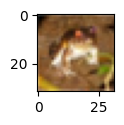

In [15]:
plot_sample(0)

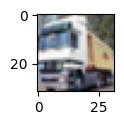

In [16]:
plot_sample(1)

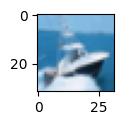

In [17]:
plot_sample(8)

In [24]:
# #Lets make classes of the predicted values to that it is easy for\
# us to evaluate the model and compare it with picstures output...
classes = ["airplane", "automibile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

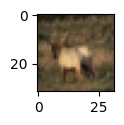

In [20]:
plot_sample(3)

In [21]:
y_train[3]

array([4], dtype=uint8)

In [25]:
classes[y_train[3][0]]

'deer'

In [26]:
#lets scale the images so that our model can perform better

X_train_scaled = X_train/255
y_train_scaled = y_train/255

In [27]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [29]:
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [31]:
#lets do one hot encoding to mark our labes as per categorcial valueus...
#Doing it mannualy...


y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')


print(y_train_categorical[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [32]:
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')


In [36]:
#lets build the model using keras sequential
#Firt we have to flatten the layer using keras flatten layer...

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = "relu"),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

#lets compile
#Spare is used when y is discreate value
#but if we have categorcial or one hot we use categoical crossentropy

model.compile(optimizer ="SGD",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(X_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8132 - accuracy: 0.3550
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6255 - accuracy: 0.4253
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5441 - accuracy: 0.4559
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4857 - accuracy: 0.4774
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4337 - accuracy: 0.4971
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3906 - accuracy: 0.5119
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3529 - accuracy: 0.5238
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3179 - accuracy: 0.5378
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2841 - accuracy: 0.5485
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.25